# Bank Customer Churn Prediction
### Team: Lavan Theja Jada & Likhitha Kothrepally

# 1. Data Cleaning/Processing

### Step 1: Loading the libraries and dataset into our environment

In [2]:
# read a dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank_customer_churn.csv')   
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,101348.88,1,Yes,Yes
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,112542.58,0,No,Yes
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,113931.57,1,Yes,No
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,93826.63,0,No,No
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,79084.10,0,Yes,Yes


### Step 2: Checking the size of the dataset

In [3]:
df.shape

(10000, 14)

### Step 3:Checking the type, count of data present in the file

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9999 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          9996 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  EstimatedSalary  9994 non-null   float64
 11  Exited           10000 non-null  int64  
 12  Credit Card      10000 non-null  object 
 13  Active Member    10000 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.1+ MB


### Step 4: Counting the number of unique values in a dataset

In [5]:
df.nunique()

RowNumber          9994
CustomerId         9994
Surname            2931
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6378
NumOfProducts         4
EstimatedSalary    9988
Exited                2
Credit Card           2
Active Member         2
dtype: int64

### Step 5: Check whether there are any missing or null values present in our data 

In [6]:
# check missing values
df.isnull().sum()  

RowNumber          0
CustomerId         0
Surname            0
CreditScore        1
Geography          0
Gender             0
Age                0
Tenure             0
Balance            4
NumOfProducts      0
EstimatedSalary    6
Exited             0
Credit Card        0
Active Member      0
dtype: int64

In [7]:
#  drop missing value rows
df.dropna(inplace=True)

### Step 6: Checking for duplicated values and dropping them

In [8]:
# checking for duplicated values 
df.duplicated().sum()

3

In [9]:
#Dropping duplicated values and rechecking
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Step 7: Dropping Unwanted columns

In [10]:
# drop rowNumber column 
df.drop('RowNumber',axis=1,inplace=True)
df.drop('CustomerId',axis=1,inplace=True)
df.drop('Surname',axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member
0,619.0,France,Female,42,2,0.00,1,101348.88,1,Yes,Yes
1,608.0,Spain,Female,41,1,83807.86,1,112542.58,0,No,Yes
2,502.0,France,Female,42,8,159660.80,3,113931.57,1,Yes,No
3,699.0,France,Female,39,1,0.00,2,93826.63,0,No,No
4,850.0,Spain,Female,43,2,125510.82,1,79084.10,0,Yes,Yes


### Step 8: Checking datatype of each column to convert them into categorical type


In [11]:
df.dtypes

CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
EstimatedSalary    float64
Exited               int64
Credit Card         object
Active Member       object
dtype: object

### Step 9: Convert features with string datatype to categorical

In [12]:
# convert geography to numerical type
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

# convert active member to numerical type
df['Active Member'] = df['Active Member'].astype('category')
df['Active Member'] = df['Active Member'].cat.codes

# convert credit card to numerical type
df['Credit Card'] = df['Credit Card'].astype('category')
df['Credit Card'] = df['Credit Card'].cat.codes

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member
0,619.0,France,0,42,2,0.00,1,101348.88,1,1,1
1,608.0,Spain,0,41,1,83807.86,1,112542.58,0,0,1
2,502.0,France,0,42,8,159660.80,3,113931.57,1,1,0
3,699.0,France,0,39,1,0.00,2,93826.63,0,0,0
4,850.0,Spain,0,43,2,125510.82,1,79084.10,0,1,1


In [13]:
df.dtypes

CreditScore        float64
Geography           object
Gender                int8
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
EstimatedSalary    float64
Exited               int64
Credit Card           int8
Active Member         int8
dtype: object

### Step 10: Converting Balance and EstimatedSalary to int type

In [14]:
# convert balance and estimatedsalary to int type
df['Balance'] = df['Balance'].astype('int64')
df['EstimatedSalary'] = df['EstimatedSalary'].astype('int64')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member
0,619.0,France,0,42,2,0,1,101348,1,1,1
1,608.0,Spain,0,41,1,83807,1,112542,0,0,1
2,502.0,France,0,42,8,159660,3,113931,1,1,0
3,699.0,France,0,39,1,0,2,93826,0,0,0
4,850.0,Spain,0,43,2,125510,1,79084,0,1,1


### Step 11: Filtering rows by age column

In [15]:
# filter age based on 18 and below 70
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member
0,619.0,France,0,42,2,0,1,101348,1,1,1
1,608.0,Spain,0,41,1,83807,1,112542,0,0,1
2,502.0,France,0,42,8,159660,3,113931,1,1,0
3,699.0,France,0,39,1,0,2,93826,0,0,0
4,850.0,Spain,0,43,2,125510,1,79084,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,1,39,5,0,2,96270,0,1,0
9996,516.0,France,1,35,10,57369,1,101699,0,1,1
9997,709.0,France,0,36,7,0,1,42085,1,0,1
9998,772.0,Germany,1,42,3,75075,2,92888,1,1,0


# Exploratory Data Analysis (EDA)

### Step 1: Describing the data such as calculating mean,standard deviation, min, max etc

In [16]:
# describe the data
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member
count,9853.000000,9853.000000,9853.000000,9853.000000,9853.000000,9853.000000,9853.000000,9853.000000,9853.000000,9853.000000
mean,650.405663,0.546230,38.437836,5.012585,76601.729118,1.530397,100106.721912,0.205521,0.705369,0.509692
std,96.723726,0.497884,9.673188,2.891046,62385.190657,0.582439,57476.334807,0.404102,0.455900,0.499931
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
25%,583.000000,0.000000,32.000000,3.000000,0.000000,1.000000,51099.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97331.000000,1.000000,100200.000000,0.000000,1.000000,1.000000
75%,718.000000,1.000000,43.000000,7.000000,127675.000000,2.000000,149370.000000,0.000000,1.000000,1.000000
max,850.000000,1.000000,70.000000,10.000000,250898.000000,4.000000,199992.000000,1.000000,1.000000,1.000000


### Step 2: Checking for missing values i.e., NaN or None

In [17]:
df.isna()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


### Step 3: Univariate Analysis

count    9853.000000
mean      650.405663
std        96.723726
min       350.000000
25%       583.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64


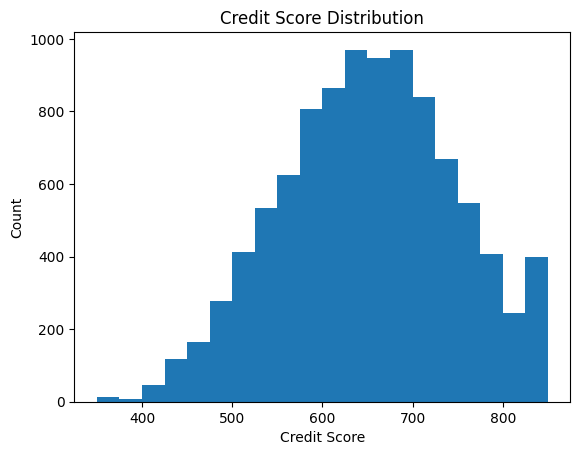

In [18]:
print(df['CreditScore'].describe())
plt.hist(df['CreditScore'], bins=20)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()


France     4937
Germany    2473
Spain      2443
Name: Geography, dtype: int64


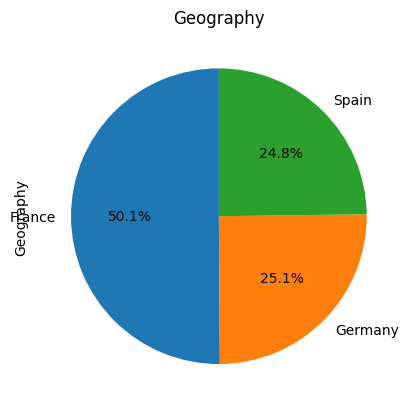

In [19]:
# Geography column
print(df['Geography'].value_counts())
df['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Geography')
plt.show()


1    5382
0    4471
Name: Gender, dtype: int64


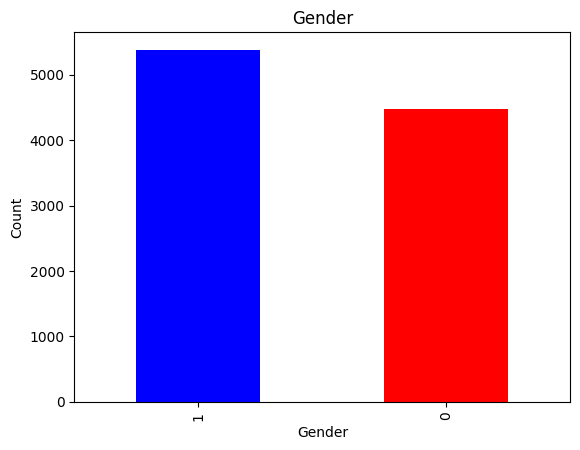

In [20]:
# Gender column
print(df['Gender'].value_counts())
colors = ['blue', 'red' ]
df['Gender'].value_counts().plot(kind='bar', color=colors)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

count    9853.000000
mean       38.437836
std         9.673188
min        18.000000
25%        32.000000
50%        37.000000
75%        43.000000
max        70.000000
Name: Age, dtype: float64


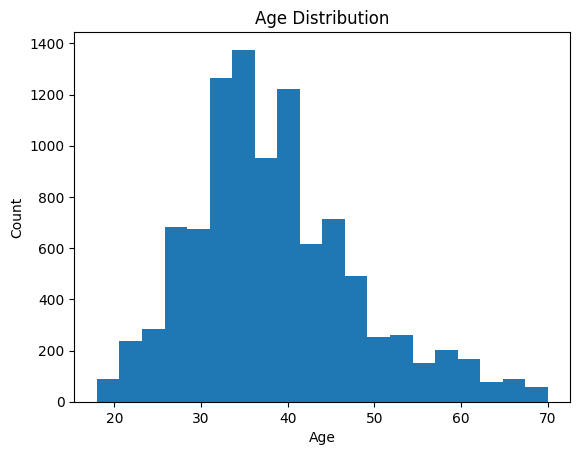

In [21]:
# Age column
print(df['Age'].describe())
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

count    9853.000000
mean        5.012585
std         2.891046
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


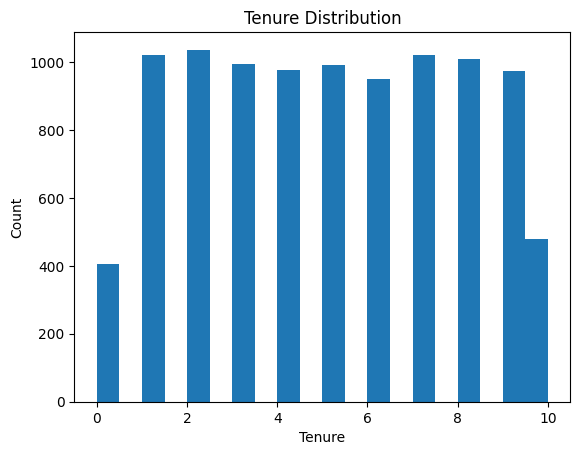

In [22]:
# Tenure column
print(df['Tenure'].describe())
plt.hist(df['Tenure'], bins=20)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

count      9853.000000
mean      76601.729118
std       62385.190657
min           0.000000
25%           0.000000
50%       97331.000000
75%      127675.000000
max      250898.000000
Name: Balance, dtype: float64


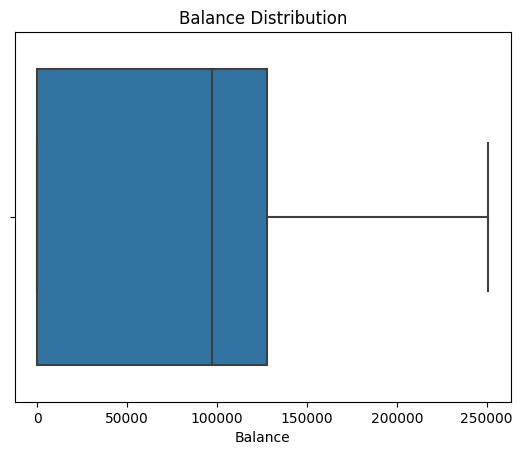

In [23]:
# Balance column
print(df['Balance'].describe())
sns.boxplot(x='Balance', data=df)
plt.title('Balance Distribution')
plt.show()

1    5011
2    4518
3     264
4      60
Name: NumOfProducts, dtype: int64


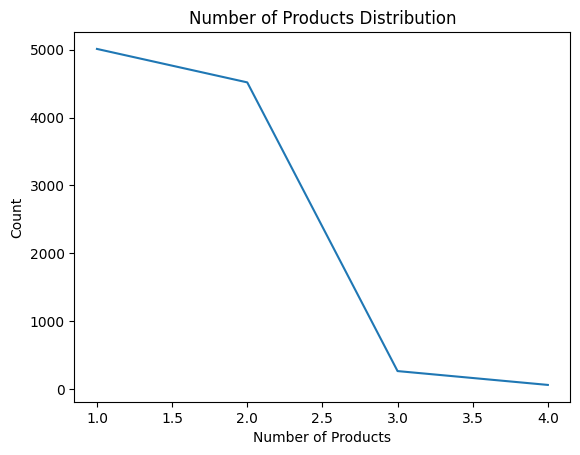

In [24]:
# NumOfProducts column
print(df['NumOfProducts'].value_counts())
df['NumOfProducts'].value_counts().plot(kind='line')
plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

count      9853.000000
mean     100106.721912
std       57476.334807
min          11.000000
25%       51099.000000
50%      100200.000000
75%      149370.000000
max      199992.000000
Name: EstimatedSalary, dtype: float64


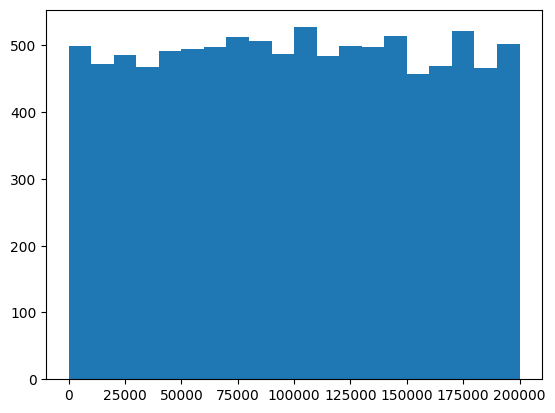

In [25]:
# EstimatedSalary column
print(df['EstimatedSalary'].describe())
plt.hist(df['EstimatedSalary'], bins=20)
plt.show()

0    7828
1    2025
Name: Exited, dtype: int64


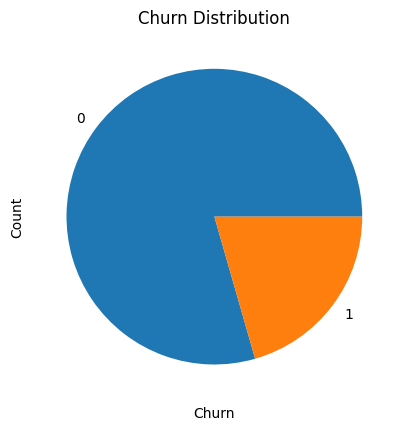

In [26]:
# Exited column
print(df['Exited'].value_counts())
df['Exited'].value_counts().plot(kind='pie')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

1    6950
0    2903
Name: Credit Card, dtype: int64


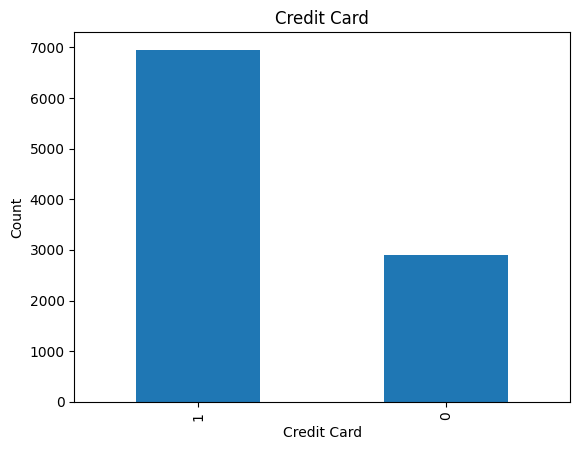

In [27]:
# Credit Card column
print(df['Credit Card'].value_counts())
df['Credit Card'].value_counts().plot(kind='bar')
plt.title('Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

1    5022
0    4831
Name: Active Member, dtype: int64


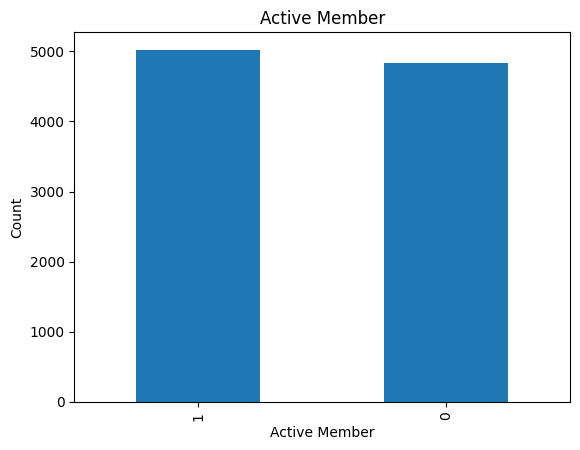

In [28]:
# Active Member column
print(df['Active Member'].value_counts())
df['Active Member'].value_counts().plot(kind='bar')
plt.title('Active Member')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.show()

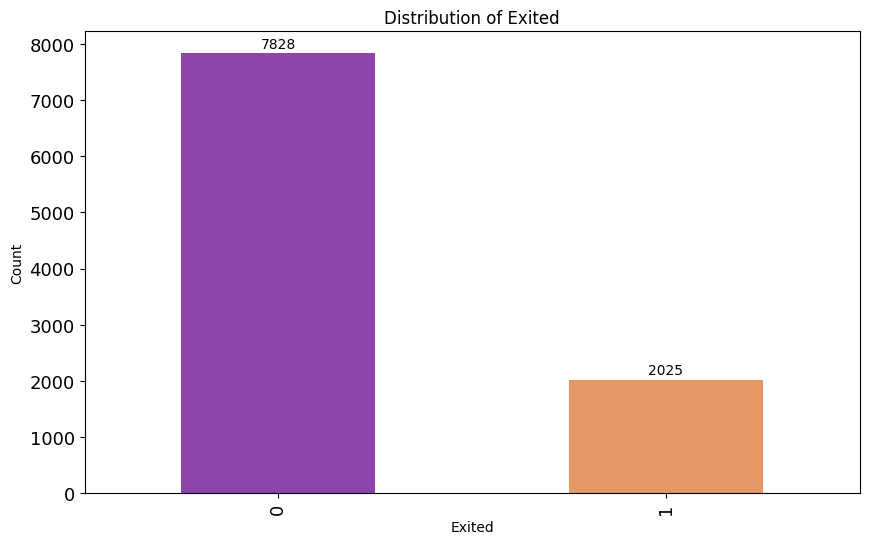

In [29]:
# check the distribution of the target variable and show the count of each class
colors = ['#8E44AD', '#E59866' ]
ax = df['Exited'].value_counts().plot(kind='bar', figsize=(10, 6), color=colors, fontsize=13)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of Exited')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=2)
plt.show()

### Step 4: Bivariate Analysis

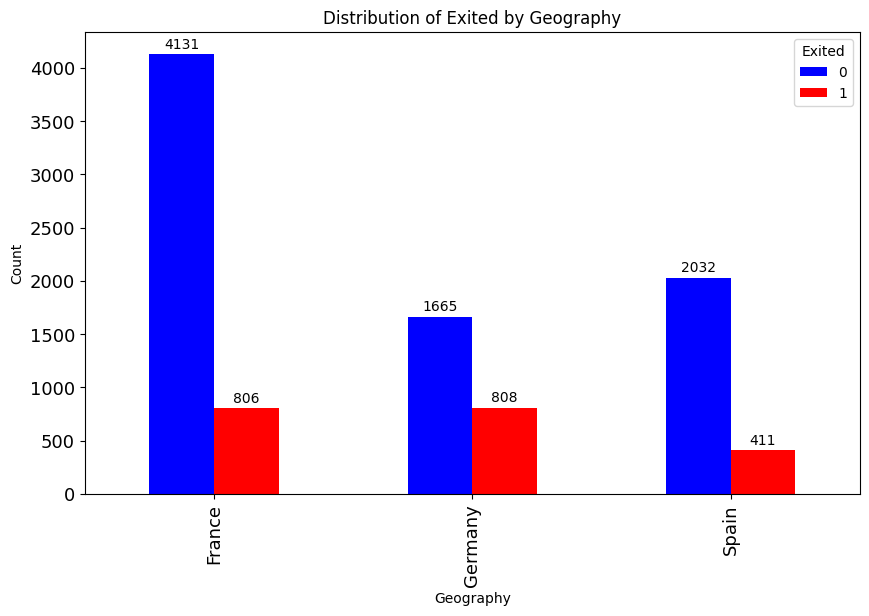

In [30]:
colors = ['blue', 'red' ]
ax = df.groupby('Geography')['Exited'].value_counts().unstack().plot(kind='bar', figsize=(10, 6), color=colors, fontsize=13)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Distribution of Exited by Geography')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=2)

plt.show()           

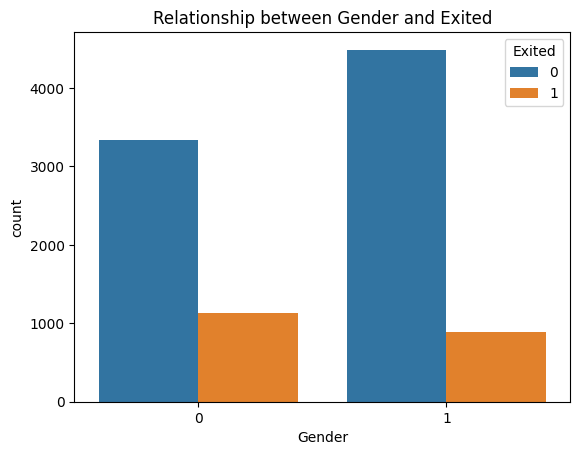

In [31]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Relationship between Gender and Exited')
plt.show()

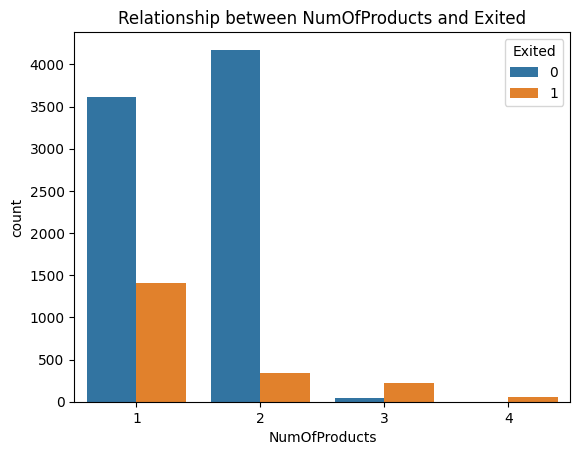

In [32]:
# graph of number of products and exited
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Relationship between NumOfProducts and Exited')
plt.show()
    

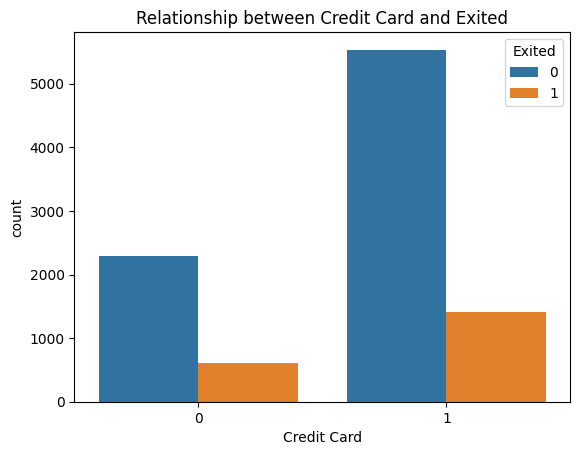

In [33]:
# plot of credit card and exited
sns.countplot(x='Credit Card', hue='Exited', data=df)
plt.title('Relationship between Credit Card and Exited')
plt.show()

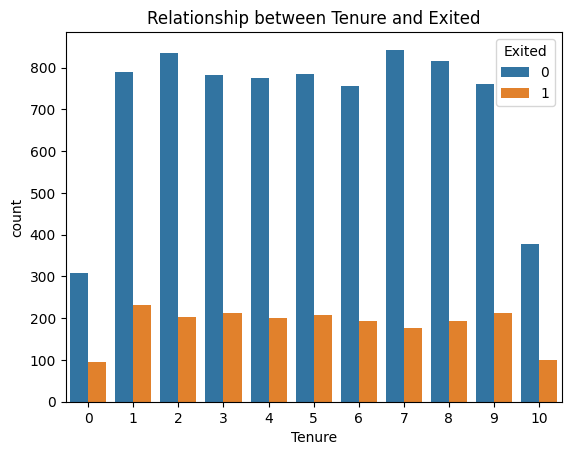

In [34]:
# plot of tenure and exited
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Relationship between Tenure and Exited')
plt.show()


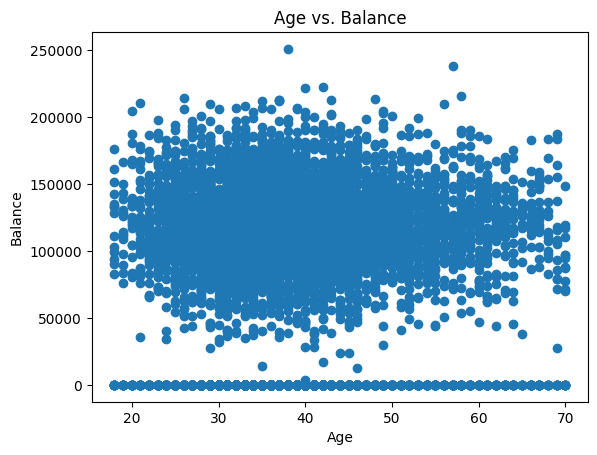

In [35]:
# scatter plot of Age vs. Balance
plt.scatter(df['Age'], df['Balance'])
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

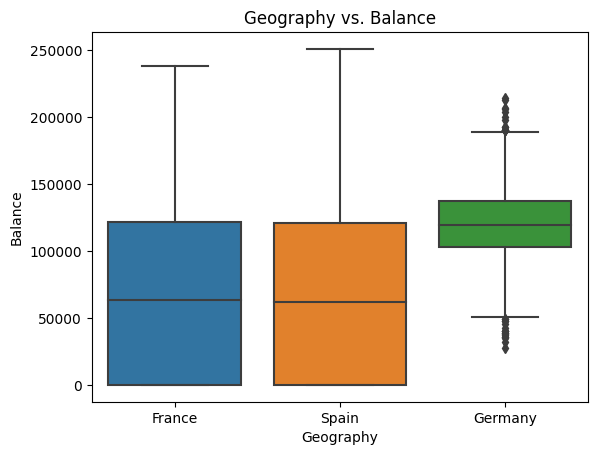

In [36]:
# box plot of Geography vs. Balance
sns.boxplot(x='Geography', y='Balance', data=df)
plt.title('Geography vs. Balance')
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.show()

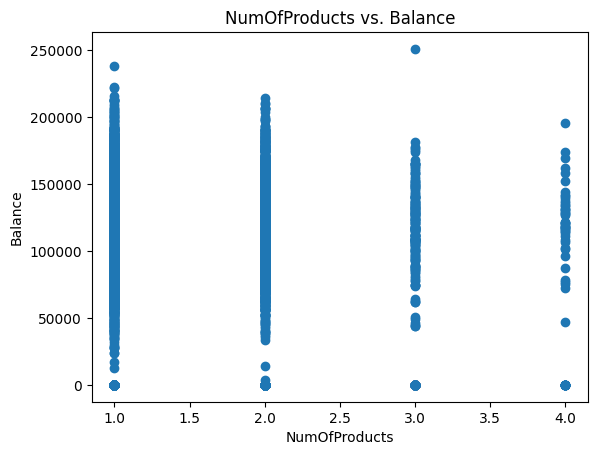

In [37]:
# scatter plot of NumOfProducts vs. Balance
plt.scatter(df['NumOfProducts'], df['Balance'])
plt.title('NumOfProducts vs. Balance')
plt.xlabel('NumOfProducts')
plt.ylabel('Balance')
plt.show()

### Step 5: MultiVariate Analysis

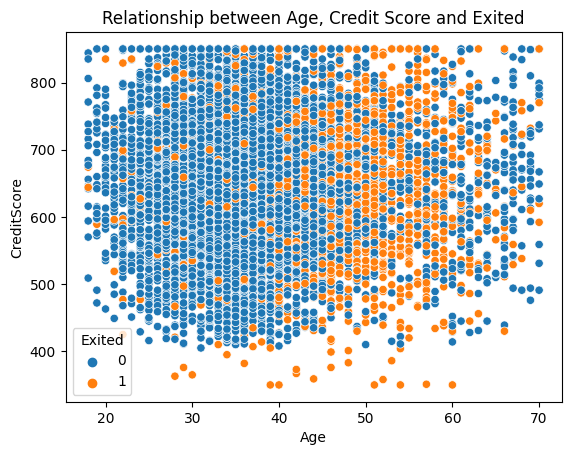

In [38]:
# multivariate analysis for age and Credit Score and exited
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=df)
plt.title('Relationship between Age, Credit Score and Exited')
plt.show()

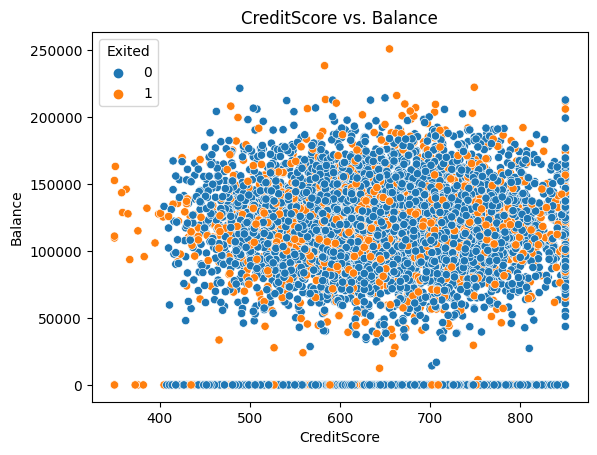

In [39]:
# scatter plot of CreditScore vs. Balance colored by Exited
sns.scatterplot(x='CreditScore', y='Balance', hue='Exited', data=df)
plt.title('CreditScore vs. Balance')
plt.xlabel('CreditScore')
plt.ylabel('Balance')
plt.show()

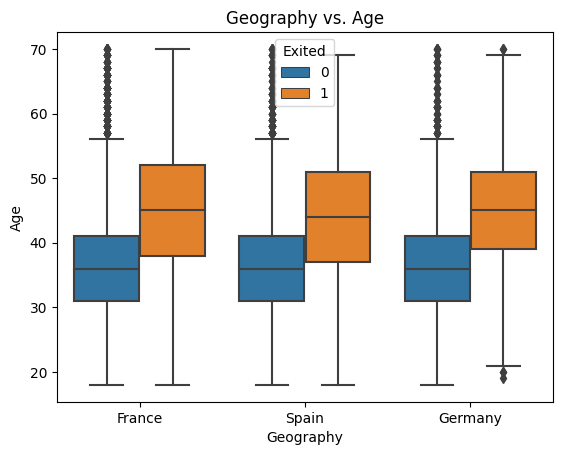

In [40]:
# box plot of Geography vs. Age colored by Exited
sns.boxplot(x='Geography', y='Age', hue='Exited', data=df)
plt.title('Geography vs. Age')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.show()

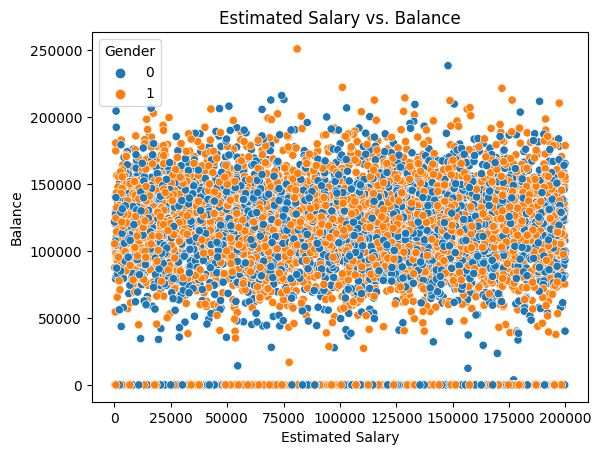

In [41]:
# scatter plot of EstimatedSalary vs. Balance colored by Gender
sns.scatterplot(x='EstimatedSalary', y='Balance', hue='Gender', data=df)
plt.title('Estimated Salary vs. Balance')
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.show()

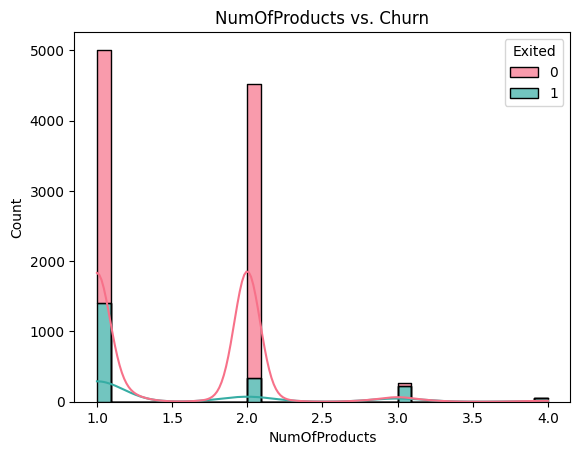

In [42]:
# histogram of NumOfProducts vs. Churn colored by Gender
sns.histplot(data=df, x='NumOfProducts', hue='Exited', kde=True, multiple='stack', palette='husl', hue_order=[0, 1], element='step', alpha=0.7)
plt.title('NumOfProducts vs. Churn')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

### Step 6: Converting Geography column to categorical type using one hot encoding

In [43]:
df = pd.get_dummies(df, columns =['Geography']) 
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member,Geography_France,Geography_Germany,Geography_Spain
0,619.0,0,42,2,0,1,101348,1,1,1,1,0,0
1,608.0,0,41,1,83807,1,112542,0,0,1,0,0,1
2,502.0,0,42,8,159660,3,113931,1,1,0,1,0,0
3,699.0,0,39,1,0,2,93826,0,0,0,1,0,0
4,850.0,0,43,2,125510,1,79084,0,1,1,0,0,1


### Step 7: Checking for Outliers

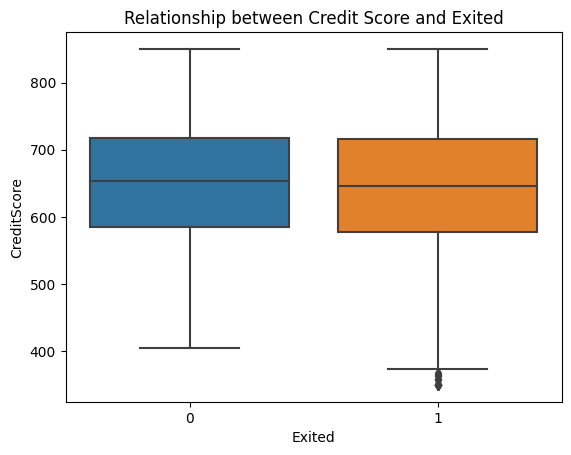

In [44]:
# box plot of credit score and exited
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Relationship between Credit Score and Exited')
plt.show()  

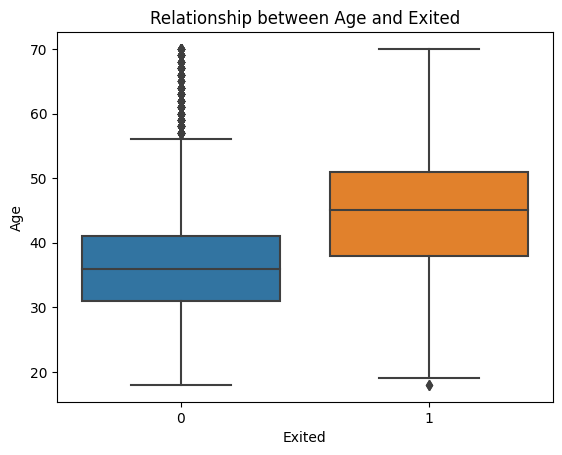

In [45]:
# box plot of age and exited and 0 is for exited and 1 is for not exited
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Relationship between Age and Exited')
plt.show()

In [46]:
# number of zero and one values in exited   
print(df['Exited'].value_counts())
        

0    7828
1    2025
Name: Exited, dtype: int64


### Step 8: Removing outliers

In [47]:
# remove outliers of salary less than 5000
df = df[df['EstimatedSalary'] > 5000]
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member,Geography_France,Geography_Germany,Geography_Spain
0,619.0,0,42,2,0,1,101348,1,1,1,1,0,0
1,608.0,0,41,1,83807,1,112542,0,0,1,0,0,1
2,502.0,0,42,8,159660,3,113931,1,1,0,1,0,0
3,699.0,0,39,1,0,2,93826,0,0,0,1,0,0
4,850.0,0,43,2,125510,1,79084,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1,39,5,0,2,96270,0,1,0,1,0,0
9996,516.0,1,35,10,57369,1,101699,0,1,1,1,0,0
9997,709.0,0,36,7,0,1,42085,1,0,1,1,0,0
9998,772.0,1,42,3,75075,2,92888,1,1,0,0,1,0


In [48]:
# remove outliers of credit score less than 500
df = df[df['CreditScore'] >500]
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member,Geography_France,Geography_Germany,Geography_Spain
0,619.0,0,42,2,0,1,101348,1,1,1,1,0,0
1,608.0,0,41,1,83807,1,112542,0,0,1,0,0,1
2,502.0,0,42,8,159660,3,113931,1,1,0,1,0,0
3,699.0,0,39,1,0,2,93826,0,0,0,1,0,0
4,850.0,0,43,2,125510,1,79084,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1,39,5,0,2,96270,0,1,0,1,0,0
9996,516.0,1,35,10,57369,1,101699,0,1,1,1,0,0
9997,709.0,0,36,7,0,1,42085,1,0,1,1,0,0
9998,772.0,1,42,3,75075,2,92888,1,1,0,0,1,0


In [49]:
# remove age outliers'
df = df[df['Age'] < 50]

# remove age below 18
df = df[df['Age'] > 25]
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member,Geography_France,Geography_Germany,Geography_Spain
0,619.0,0,42,2,0,1,101348,1,1,1,1,0,0
1,608.0,0,41,1,83807,1,112542,0,0,1,0,0,1
2,502.0,0,42,8,159660,3,113931,1,1,0,1,0,0
3,699.0,0,39,1,0,2,93826,0,0,0,1,0,0
4,850.0,0,43,2,125510,1,79084,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1,39,5,0,2,96270,0,1,0,1,0,0
9996,516.0,1,35,10,57369,1,101699,0,1,1,1,0,0
9997,709.0,0,36,7,0,1,42085,1,0,1,1,0,0
9998,772.0,1,42,3,75075,2,92888,1,1,0,0,1,0


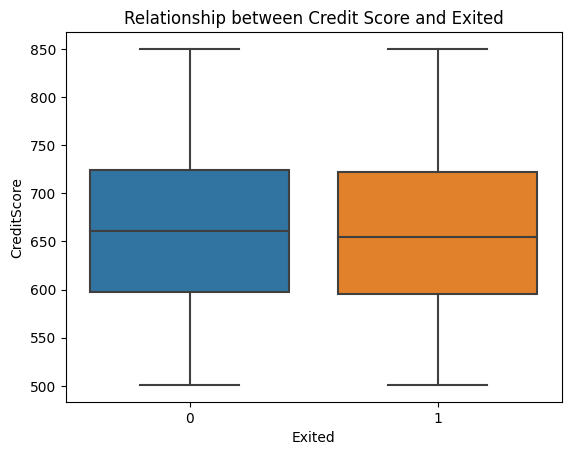

In [50]:
# box plot of credit score and exited after removing outliers
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Relationship between Credit Score and Exited')
plt.show()


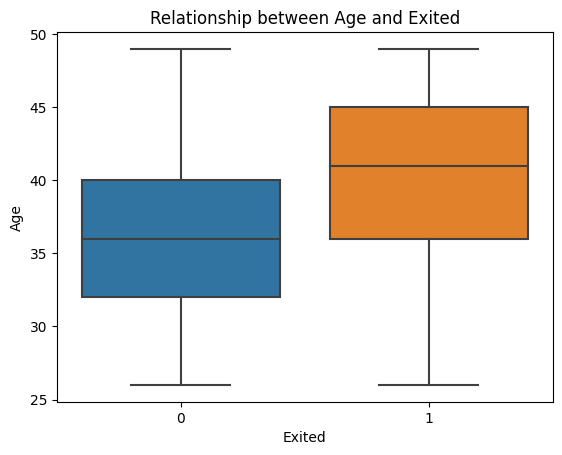

In [51]:
# box plot of age and exited after removing outliers
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Relationship between Age and Exited')    
plt.show()

### Step 9: Plotting correlation between columns

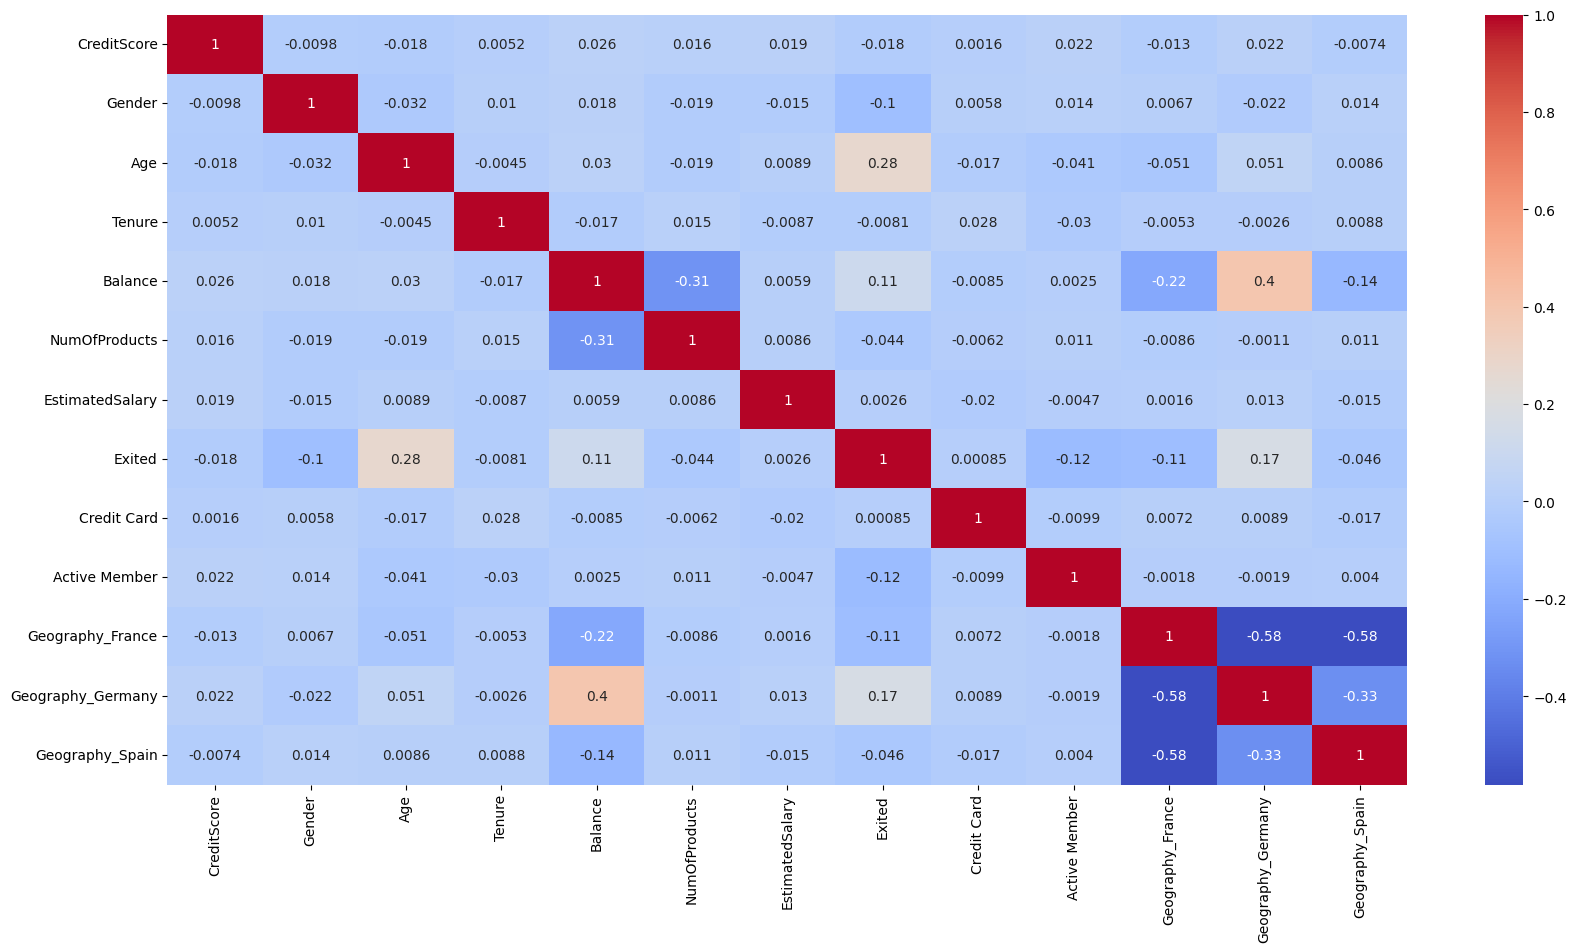

In [52]:
# plot correlation matrix and reduce size of the plot
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Step 10: Performing feature engineering to improve accuracy

In [53]:
# add column balance/estimated salary to the dataset and rename the column to balance/estimated salary ratio
df['Balance/EstimatedSalary'] = df['Balance']/df['EstimatedSalary']
df.rename(columns={'Balance/EstimatedSalary':'Balance/EstimatedSalary Ratio'}, inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member,Geography_France,Geography_Germany,Geography_Spain,Balance/EstimatedSalary Ratio
0,619.0,0,42,2,0,1,101348,1,1,1,1,0,0,0.000000
1,608.0,0,41,1,83807,1,112542,0,0,1,0,0,1,0.744673
2,502.0,0,42,8,159660,3,113931,1,1,0,1,0,0,1.401375
3,699.0,0,39,1,0,2,93826,0,0,0,1,0,0,0.000000
4,850.0,0,43,2,125510,1,79084,0,1,1,0,0,1,1.587047


In [54]:
# add column credit score/age to the dataset and rename the column to credit score/age ratio
df['CreditScore/Age'] = df['CreditScore']/df['Age']
df.rename(columns={'CreditScore/Age':'CreditScore/Age Ratio'}, inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member,Geography_France,Geography_Germany,Geography_Spain,Balance/EstimatedSalary Ratio,CreditScore/Age Ratio
0,619.0,0,42,2,0,1,101348,1,1,1,1,0,0,0.000000,14.738095
1,608.0,0,41,1,83807,1,112542,0,0,1,0,0,1,0.744673,14.829268
2,502.0,0,42,8,159660,3,113931,1,1,0,1,0,0,1.401375,11.952381
3,699.0,0,39,1,0,2,93826,0,0,0,1,0,0,0.000000,17.923077
4,850.0,0,43,2,125510,1,79084,0,1,1,0,0,1,1.587047,19.767442


In [55]:
# add column balance/ credit score to the dataset and rename the column to balance/credit score ratio
df['Balance/CreditScore'] = df['Balance']/df['CreditScore']
df.rename(columns={'Balance/CreditScore':'Balance/CreditScore Ratio'}, inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Credit Card,Active Member,Geography_France,Geography_Germany,Geography_Spain,Balance/EstimatedSalary Ratio,CreditScore/Age Ratio,Balance/CreditScore Ratio
0,619.0,0,42,2,0,1,101348,1,1,1,1,0,0,0.000000,14.738095,0.000000
1,608.0,0,41,1,83807,1,112542,0,0,1,0,0,1,0.744673,14.829268,137.840461
2,502.0,0,42,8,159660,3,113931,1,1,0,1,0,0,1.401375,11.952381,318.047809
3,699.0,0,39,1,0,2,93826,0,0,0,1,0,0,0.000000,17.923077,0.000000
4,850.0,0,43,2,125510,1,79084,0,1,1,0,0,1,1.587047,19.767442,147.658824


In [56]:
# find number of zeroes and ones in the target variable 
df['Exited'].value_counts()  

0    6042
1    1240
Name: Exited, dtype: int64

### Step 11: Normalizing Columns

In [57]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# select numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Credit Card',
                'Active Member', 'EstimatedSalary', 'Gender', 'Credit Card',
                'Geography_France', 'Geography_Germany', 'Geography_Spain',
                'Balance/EstimatedSalary Ratio', 'CreditScore/Age Ratio',
                'Balance/CreditScore Ratio']

# scale numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


### Step 12: Performing PCA to get best features

[1.74596205e-01 1.26733577e-01 1.23534777e-01 9.98623352e-02
 8.42649632e-02 7.17681389e-02 6.42568675e-02 6.33222189e-02
 6.04680818e-02 5.97776398e-02 4.48327081e-02 2.51655394e-02
 9.01079851e-04 5.15867208e-04 1.70472083e-31 4.20640102e-32]


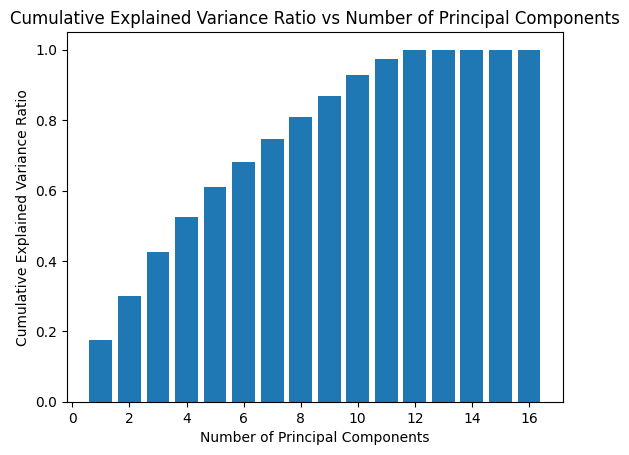

In [58]:
# perform PCA analysis
pca = PCA()
pca.fit(df[num_features])
pca_df = pd.DataFrame(pca.transform(df[num_features]))

# analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# plot cumulative explained variance ratio vs number of principal components on a bar chart
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.bar(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio)
plt.title('Cumulative Explained Variance Ratio vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [59]:

df['Exited'].value_counts()


0    6042
1    1240
Name: Exited, dtype: int64

In [60]:
# smote to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# split the dataset into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# balance the dataset
X, y = smote.fit_resample(X, y)

# split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# create random forest classifier
rfc = RandomForestClassifier()

# perform k fold cross validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(rfc, X_train, y_train, cv=kfold)
print(scores)
print(scores.mean())
        
# train the model
rfc.fit(X_train, y_train)

# predict the test set
y_pred = rfc.predict(X_test)

# import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print accuracy score
print(accuracy_score(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))



[0.89503619 0.89141675 0.89653389 0.90067253 0.90067253]
0.8968663783810389
[[1095  110]
 [ 100 1112]]
0.913115432354158
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1205
           1       0.91      0.92      0.91      1212

    accuracy                           0.91      2417
   macro avg       0.91      0.91      0.91      2417
weighted avg       0.91      0.91      0.91      2417



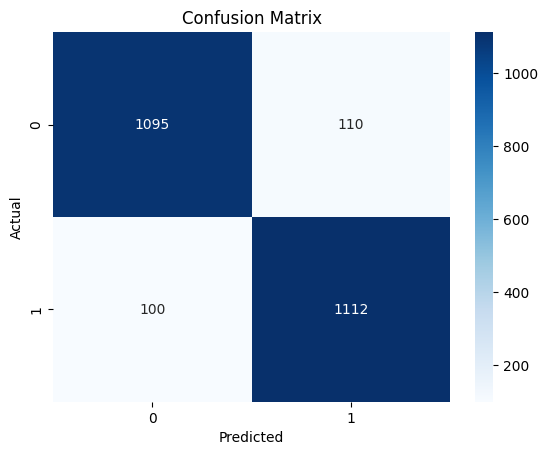

In [61]:

# plot confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
    

In [62]:
# k fold cross validation with logistic regression
from sklearn.linear_model import LogisticRegression

# create logistic regression classifier
lr = LogisticRegression()

# perform k fold cross validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(lr, X_train, y_train, cv=kfold)
print(scores)
print(scores.mean())

# train the model
lr.fit(X_train, y_train)

# predict the test set
y_pred = lr.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print accuracy score
print(accuracy_score(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))


[0.70372285 0.7114788  0.70874289 0.72788412 0.6937403 ]
0.7091137918619139
[[833 372]
 [373 839]]
0.6917666528754655
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1205
           1       0.69      0.69      0.69      1212

    accuracy                           0.69      2417
   macro avg       0.69      0.69      0.69      2417
weighted avg       0.69      0.69      0.69      2417



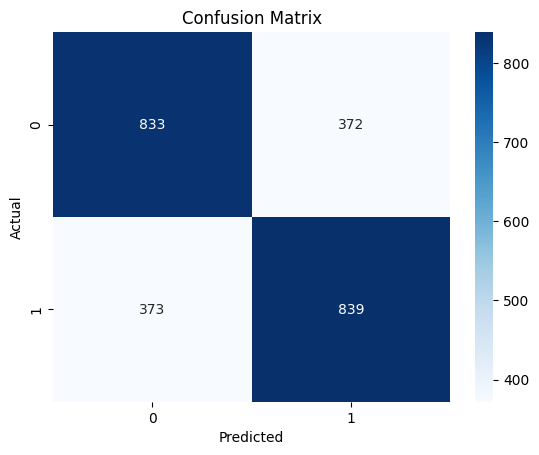

In [63]:
# plot confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
# # import necessary libraries
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import learning_curve


# # create logistic regression model
# lr = LogisticRegression()

# # define range of training set sizes
# train_sizes = np.linspace(0.1, 1.0, 10)

# # calculate learning curve
# train_sizes, train_scores, test_scores = learning_curve(lr, X, y, train_sizes=train_sizes, cv=5)

# # calculate mean and standard deviation of training and validation scores
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# # plot learning curve
# plt.figure()
# plt.title("Logistic Regression Learning Curve")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.ylim(0.0, 1.1)
# plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()


In [65]:
# # perform grid search to find optimal hyperparameters
# from sklearn.model_selection import GridSearchCV

# # create logistic regression classifier
# lr = LogisticRegression()

# # define hyperparameters
# hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#                      'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
#                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'max_iter': [100, 1000, 2500, 5000]}
# # perform grid search
# clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)

# # fit the model
# best_model = clf.fit(X_train, y_train)

# # print best score
# print('Best Score:', best_model.best_score_)

# # print best hyperparameters
# print('Best Hyperparameters:', best_model.best_params_)

# # best estimator
# print('Best Estimator:', best_model.best_estimator_)



In [66]:
# k fold cross validation with support vector machine
from sklearn.svm import SVC

# create support vector machine classifier
svc = SVC()

# perform k fold cross validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(svc, X_train, y_train, cv=kfold)
print(scores)
print(scores.mean())

# train the model
svc.fit(X_train, y_train)

# predict the test set
y_pred = svc.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print accuracy score
print(accuracy_score(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))

[0.79317477 0.79007239 0.79979307 0.80807036 0.79151578]
0.7965252718927932
[[ 947  258]
 [ 210 1002]]
0.806371534960695
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1205
           1       0.80      0.83      0.81      1212

    accuracy                           0.81      2417
   macro avg       0.81      0.81      0.81      2417
weighted avg       0.81      0.81      0.81      2417



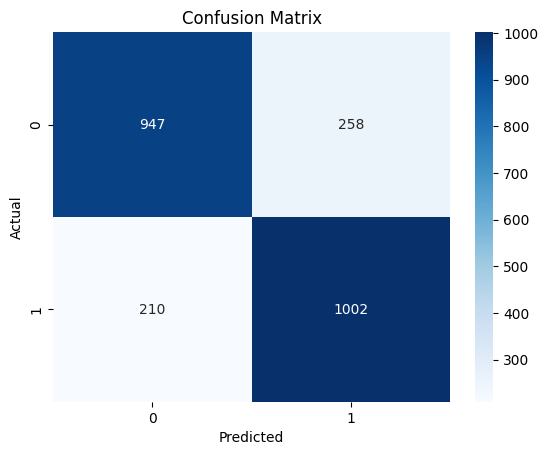

In [67]:
# confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
    

In [68]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve

# # create SVM classifier
# svm = SVC()

# # define the range of the training set sizes
# train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

# # generate the learning curve
# train_sizes, train_scores, test_scores = learning_curve(svm, X, y, cv=5, train_sizes=train_sizes, scoring='accuracy')

# # compute the mean and standard deviation of the training scores and test scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # plot the learning curve
# plt.figure(figsize=(8,6))
# plt.plot(train_sizes, train_mean, label='Training score')
# plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
# plt.plot(train_sizes, test_mean, label='Cross-validation score')
# plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1)
# plt.xlabel('Training set size')
# plt.ylabel('Accuracy score')
# plt.title('Learning curve for SVM')
# plt.legend(loc='best')
# plt.show()


In [69]:
# k fold cross validation with gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# create gradient boosting classifier
gbc = GradientBoostingClassifier()

# perform k fold cross validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(gbc, X_train, y_train, cv=kfold)
print(scores)
print(scores.mean())

# train the model
gbc.fit(X_train, y_train)

# predict the test set
y_pred = gbc.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print accuracy score
print(accuracy_score(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))

# import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# # create gradient boosting classifier
# clf = GradientBoostingClassifier()

# # generate learning curve
# train_sizes, train_scores, test_scores = learning_curve(
#     clf, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

# # calculate mean and standard deviation of training and test scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # plot learning curve
# plt.plot(train_sizes, train_mean, label='Training score')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.plot(train_sizes, test_mean, label='Cross-validation score')
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title('Gradient Boosting Classifier Learning Curve')
# plt.xlabel('Training Size')
# plt.ylabel('Score')
# plt.legend()
# plt.show()


[0.87125129 0.87642192 0.88722193 0.88773927 0.8696327 ]
0.8784534223263185
[[1092  113]
 [ 161 1051]]
0.8866363260239967
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1205
           1       0.90      0.87      0.88      1212

    accuracy                           0.89      2417
   macro avg       0.89      0.89      0.89      2417
weighted avg       0.89      0.89      0.89      2417



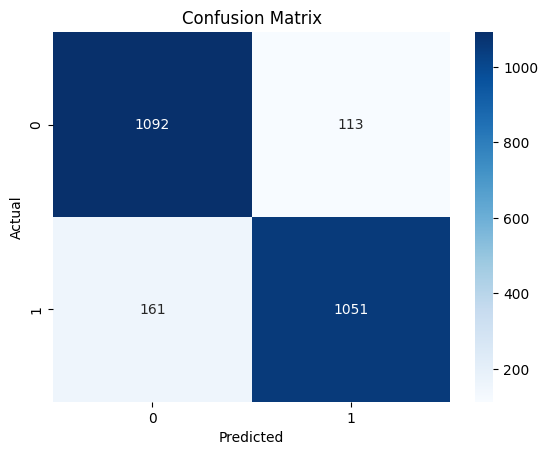

In [70]:
# confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [71]:
# # k fold cross validation with neural networks
# from sklearn.neural_network import MLPClassifier

# # create neural network classifier
# mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
#                     max_iter=500, random_state=42)

# # perform k fold cross validation
# kfold = KFold(n_splits=5, random_state=42, shuffle=True)
# scores = cross_val_score(mlp, X_train, y_train, cv=kfold)
# print(scores)
# print(scores.mean())

# # train the model
# mlp.fit(X_train, y_train)

# # predict the test set 
# y_pred = mlp.predict(X_test)
        

In [72]:

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print accuracy score
print(accuracy_score(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))

[[1092  113]
 [ 161 1051]]
0.8866363260239967
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1205
           1       0.90      0.87      0.88      1212

    accuracy                           0.89      2417
   macro avg       0.89      0.89      0.89      2417
weighted avg       0.89      0.89      0.89      2417



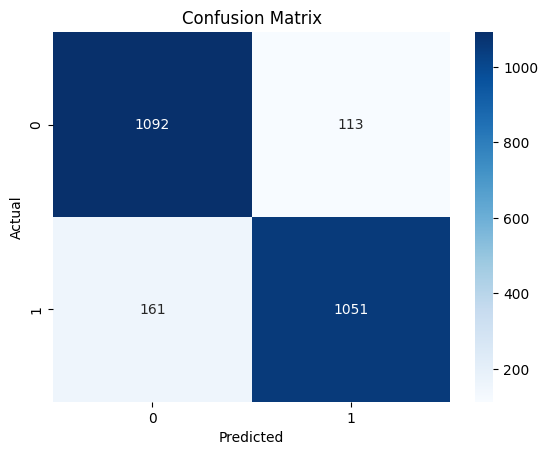

In [73]:
# confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
    

In [74]:
# k fold cross validation with XGBoost
from xgboost import XGBClassifier

# create XGBoost classifier
xgb = XGBClassifier()

# perform k fold cross validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(xgb, X_train, y_train, cv=kfold)
print(scores)

# train the model
xgb.fit(X_train, y_train)

# predict the test set
y_pred = xgb.predict(X_test)    

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print accuracy score
print(accuracy_score(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))

[0.91571872 0.91106515 0.90843249 0.91101914 0.90739783]
[[1124   81]
 [ 140 1072]]
0.9085643359536616
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1205
           1       0.93      0.88      0.91      1212

    accuracy                           0.91      2417
   macro avg       0.91      0.91      0.91      2417
weighted avg       0.91      0.91      0.91      2417



In [75]:
# hyperparameter tuning with XGBoost

from sklearn.model_selection import GridSearchCV
# parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'min_child_weight': [1, 5, 10],
    'n_estimators': [10, 50, 100],
}

# create XGBoost classifier
xgb = XGBClassifier()

# perform grid search
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the model
grid.fit(X_train, y_train)

# print best score and parameters
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)



NameError: name 'GridSearchCV' is not defined

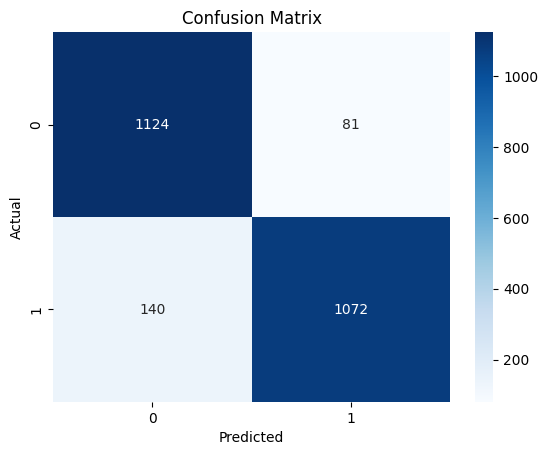

In [76]:
# confusion Matrix  
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
    

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve

# from sklearn.model_selection import GridSearchCV

# # define the learning curve
# train_sizes, train_scores, test_scores = learning_curve(xgb, X, y, cv=kfold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# # calculate the mean and standard deviation of the training and validation scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # plot the learning curve
# plt.plot(train_sizes, train_mean, label='Training score')
# plt.plot(train_sizes, test_mean, label='Cross-validation score')

# # fill the area between the lines
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# # add labels and legend
# plt.xlabel('Training Set Size')
# plt.ylabel('Accuracy Score')
# plt.title('XGBoost Learning Curve')
# plt.legend(loc='best')

# # show the plot
# plt.show()


C:\Users\lavan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


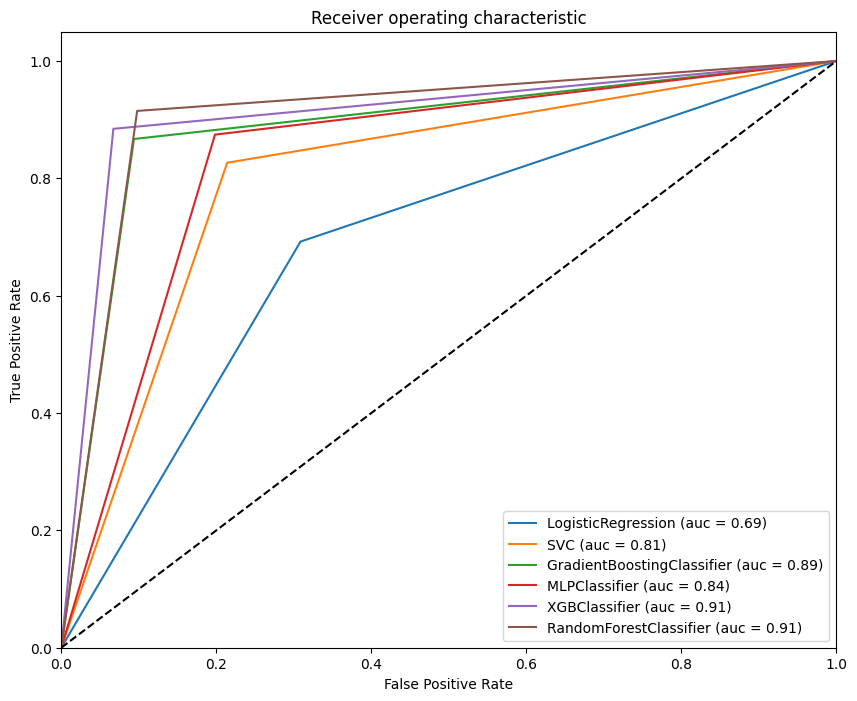

In [77]:
# ROC curve for all models  
# define your classifiers and X, y data

#import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
        
classifiers = [LogisticRegression(), SVC(), GradientBoostingClassifier(), MLPClassifier(), XGBClassifier(), RandomForestClassifier()] 

# plot the ROC curve
plt.figure(figsize=(10, 8))
for clf in classifiers: 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=clf.__class__.__name__ + ' (auc = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
    


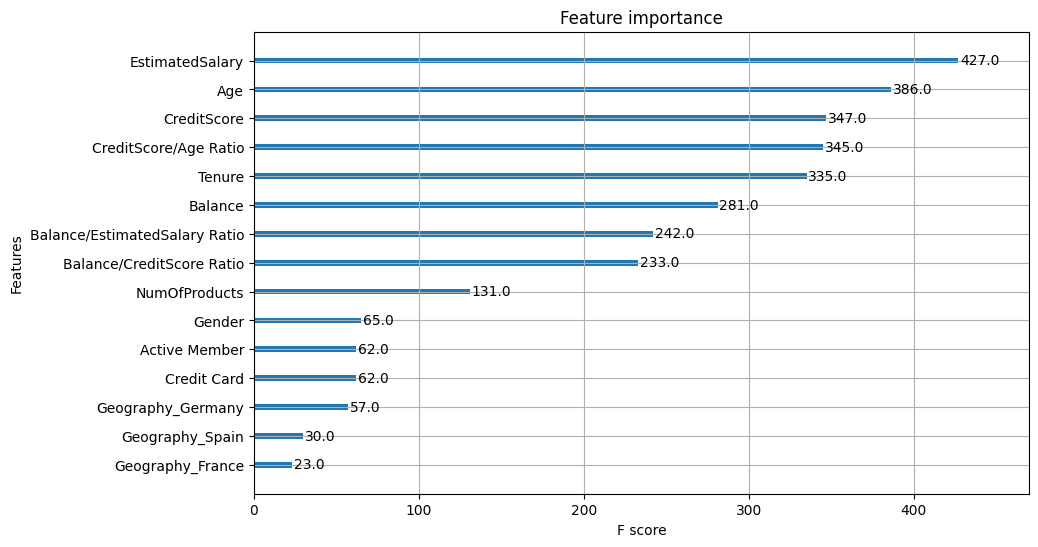

In [78]:

import matplotlib.pyplot as plt
import xgboost as xgb

# fit XGBoost model on the data
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# plot feature importance
fig, ax = plt.subplots(figsize=(10,6))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()


In [82]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # create the random forest classifier
# rfc = RandomForestClassifier(random_state=42)

# # create the grid search object
# grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# # fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # print the best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [ ]:

from sklearn.metrics import classification_report

# create the random forest classifier with best parameters
rfc_best = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)

# fit the model to the training data
rfc_best.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc_best.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1205
           1       0.91      0.93      0.92      1212

    accuracy                           0.92      2417
   macro avg       0.92      0.92      0.92      2417
weighted avg       0.92      0.92      0.92      2417



In [ ]:

# # Define SVM model
# svm = SVC(kernel='rbf')

# # Define parameter grid for grid search
# param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': [None, 'balanced']}

# # Define grid search object with cross-validation
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# # Perform grid search with cross-validation
# grid_search.fit(X_train, y_train)

# # Print best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Fit SVM model on entire training set with best parameters and evaluate on test set
# best_svm = grid_search.best_estimator_
# best_svm.fit(X_train, y_train)
# y_pred_test = best_svm.predict(X_test)
# accuracy_test = accuracy_score(y_test, y_pred_test)


Best parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto'}
Best score: 0.8421425403552621


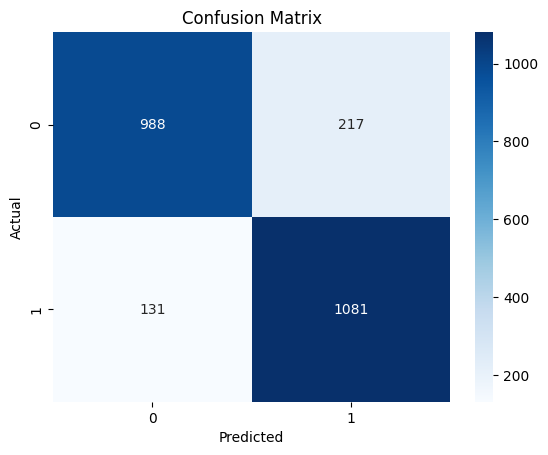

In [ ]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
    

In [ ]:
# classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1205
           1       0.83      0.89      0.86      1212

    accuracy                           0.86      2417
   macro avg       0.86      0.86      0.86      2417
weighted avg       0.86      0.86      0.86      2417

